<a href="https://colab.research.google.com/github/SVG-campus/robus-optimization-and-risk-tail-control/blob/main/robus_optimization_and_risk_tail_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cvxpy matplotlib numpy pandas

Optimal x: [0.55622738 0.44377262]
CVaR Value: 3.2382290689044413


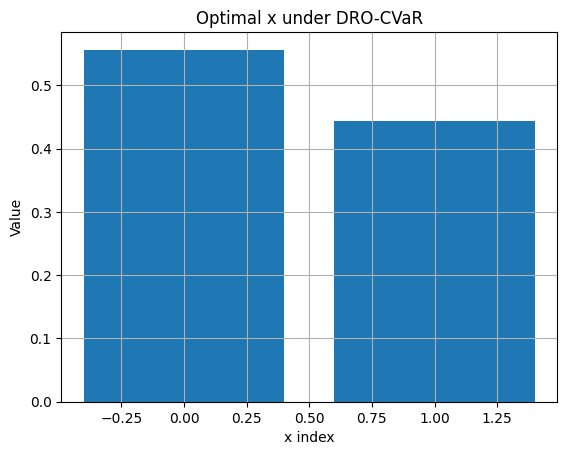

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
n = 2  # Number of decision variables
N = 100  # Number of scenarios
alpha = 0.95  # CVaR confidence level
epsilon = 0.1  # Wasserstein ambiguity size

# Generate synthetic scenario data
np.random.seed(42)
losses = np.random.randn(N, n) + 2

# Variables
x = cp.Variable(n)
eta = cp.Variable()
xi = cp.Variable(N)

# Loss function
costs = losses @ x

# Objective
objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

# Constraints
constraints = [
    xi >= costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1
]

# Solve
problem = cp.Problem(objective, constraints)
problem.solve()

# Output
print("Optimal x:", x.value)
print("CVaR Value:", eta.value + (1 / ((1 - alpha) * N)) * np.sum(np.maximum(costs.value - eta.value, 0)))

# Visual
plt.bar(range(n), x.value)
plt.title("Optimal x under DRO-CVaR")
plt.xlabel("x index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [ ]:
!pip install -q cvxpy[ecos] gurobipy matplotlib pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Download Gurobi (this version is okay for academic use)
!wget https://packages.gurobi.com/10.0/gurobi10.0.1_linux64.tar.gz
!tar -xvzf gurobi10.0.1_linux64.tar.gz

# Step 2: Set up environment variables
import os
os.environ['GUROBI_HOME'] = '/content/gurobi10.0.1_linux64'
os.environ['PATH'] += ':/content/gurobi10.0.1_linux64/bin'
os.environ['LD_LIBRARY_PATH'] = '/content/gurobi10.0.1_linux64/lib'
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

--2025-06-27 20:44:50--  https://packages.gurobi.com/10.0/gurobi10.0.1_linux64.tar.gz
Resolving packages.gurobi.com (packages.gurobi.com)... 18.239.50.68, 18.239.50.50, 18.239.50.72, ...
Connecting to packages.gurobi.com (packages.gurobi.com)|18.239.50.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79124339 (75M) [application/x-gzip]
Saving to: ‘gurobi10.0.1_linux64.tar.gz’

gurobi10.0.1_linux6 100%[===================>]  75.46M   148MB/s    in 0.5s    

2025-06-27 20:44:51 (148 MB/s) - ‘gurobi10.0.1_linux64.tar.gz’ saved [79124339/79124339]

gurobi1001/
gurobi1001/linux64/
gurobi1001/linux64/lib/
gurobi1001/linux64/lib/libgurobi_g++5.2.a
gurobi1001/linux64/lib/gurobi.jar
gurobi1001/linux64/lib/gurobi-javadoc.jar
gurobi1001/linux64/lib/gurobi100.netstandard20.dll
gurobi1001/linux64/lib/gurobi100.netstandard20.xml
gurobi1001/linux64/lib/libgurobi.so.10.0.1
gurobi1001/linux64/lib/libgurobi100_light.so
gurobi1001/linux64/lib/libGurobiJni100.so
gurobi1001/linu

In [ ]:
# Replace LICENSE_KEY with your actual key
!echo "LICENSEID=2682966\nTOKEN=3f06aa50-ecd8-4ee4-ac9d-5880735d1a31" > /root/gurobi.lic

In [ ]:
!mkdir -p /root/.gurobi
!echo "GRB_LICENSE_FILE=/root/gurobi.lic" >> /root/.bashrc

In [ ]:
%%writefile /root/gurobi.lic
VERSION=1
HOSTID=abcd1234efgh5678ijkl90mnop
PORT=4181
EXPIRATION=2026-06-27
LICENSEID=2682966

Overwriting /root/gurobi.lic


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gurobi.lic to gurobi.lic


In [ ]:
!mv gurobi.lic /root/gurobi.lic

In [ ]:
import os
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

In [ ]:
problem.solve(solver=cp.GUROBI, verbose=True)

(CVXPY) Jun 27 08:53:40 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:53:40 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:53:40 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:53:40 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:53:40 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 08:53:40 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 08:53:40 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 08:53:40 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 08:53:40 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 08:53:40 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 08:53:40 PM: Applying reduction GUROBI
(CVXPY) Jun 27 08:53:40 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2682971
Academic license 2682971 - for non-commercial use only - registered to pr___@gmail.com
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CP

(CVXPY) Jun 27 08:53:41 PM: Problem status: optimal
(CVXPY) Jun 27 08:53:41 PM: Optimal value: 3.309e+00
(CVXPY) Jun 27 08:53:41 PM: Compilation took 4.227e-02 seconds
(CVXPY) Jun 27 08:53:41 PM: Solver (including time spent in interface) took 3.428e-01 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


np.float64(3.3093856283827185)

In [ ]:
import os
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'  # ensure license location

import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 2
N = 100
alpha = 0.95
epsilon = 0.1

losses = np.random.randn(N, n) + 2

x = cp.Variable(n)
z = cp.Variable(n, boolean=True)
eta = cp.Variable()
xi = cp.Variable(N)

scenario_costs = losses @ x

objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

constraints = [
    xi >= scenario_costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2
]

problem = cp.Problem(objective, constraints)

# Try solving with Gurobi, fallback to ECOS_BB if unavailable
try:
    problem.solve(solver=cp.GUROBI, verbose=True)
except Exception as e:
    print("Gurobi failed:", e)
    problem.solve(solver=cp.ECOS_BB, verbose=True)

# Extract results
x_val = x.value
z_val = z.value
cvar_val = eta.value + (1 / ((1 - alpha) * N)) * np.sum(np.maximum((losses @ x_val) - eta.value, 0))

print("Optimal x:", x_val)
print("Binary decisions z:", z_val)
print("CVaR Value:", cvar_val)

plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='mediumseagreen')
plt.title("Optimal x with Binary Control (DRO-CVaR)")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

(CVXPY) Jun 27 08:49:05 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:49:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:49:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:49:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:49:05 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 08:49:05 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 08:49:05 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 08:49:05 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 08:49:05 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 08:49:05 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 08:49:05 PM: Applying reduction GUROBI
(CVXPY) Jun 27 08:49:05 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter TSPort to value 4181
Set parameter LicenseID to value 2682966


(CVXPY) Jun 27 08:49:05 PM: Your problem has 105 variables, 206 constraints, and 0 parameters.
(CVXPY) Jun 27 08:49:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 08:49:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 08:49:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 08:49:05 PM: Your problem is compiled with the CPP canonicalization backend.


Gurobi failed: HostID mismatch (licensed to cd1234ef, hostid is ac1c000c)
                                     CVXPY                                     
                                     v1.6.6                                    


SolverError: The solver ECOS_BB is not installed.

(CVXPY) Jun 27 09:00:49 PM: Your problem has 107 variables, 207 constraints, and 0 parameters.
(CVXPY) Jun 27 09:00:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 27 09:00:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 27 09:00:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 27 09:00:49 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jun 27 09:00:49 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jun 27 09:00:49 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jun 27 09:00:49 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 27 09:00:49 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 27 09:00:49 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 27 09:00:49 PM: Applying reduction GUROBI
(CVXPY) Jun 27 09:00:49 PM: Finished problem compilation 

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Non-default parameters:
QCPDual  1

Academic license 268

(CVXPY) Jun 27 09:00:49 PM: Problem status: optimal
(CVXPY) Jun 27 09:00:49 PM: Optimal value: 1.895e+00
(CVXPY) Jun 27 09:00:49 PM: Compilation took 4.436e-02 seconds
(CVXPY) Jun 27 09:00:49 PM: Solver (including time spent in interface) took 2.093e-01 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
       Metric                                       Value
0   Optimal x     [0.556227380743062, 0.4437726192771853]
1    Active z                                  [1.0, 1.0]
2  CVaR Value                                    1.824016
3         eta                             1.7124075370234
4       delta  [-0.7071067800925741, -0.7071067800925741]


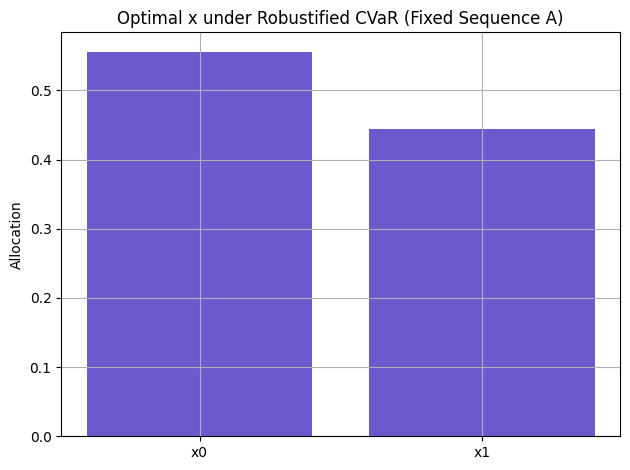

In [ ]:
import os
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ================================
# Set Gurobi license path
# ================================
os.environ['GRB_LICENSE_FILE'] = '/root/gurobi.lic'

# ================================
# Parameters
# ================================
np.random.seed(42)
n = 2             # Number of decision variables
N = 100           # Number of scenarios
alpha = 0.95      # CVaR confidence level
epsilon = 0.1     # Regularization coefficient
Gamma = 1.0       # Uncertainty budget

# ================================
# Nominal scenario losses
# ================================
nominal_losses = np.random.randn(N, n) + 2

# ================================
# Sensitivity vector v (fixed)
# ================================
v = np.ones(n)

# ================================
# Decision variables
# ================================
x = cp.Variable(n)
z = cp.Variable(n, boolean=True)
eta = cp.Variable()
xi = cp.Variable(N)
delta = cp.Variable(n)

# ================================
# Scenario costs with affine perturbation
# ================================
scenario_costs = nominal_losses @ x + v @ delta

# ================================
# Objective function
# ================================
objective = cp.Minimize(
    eta + (1 / ((1 - alpha) * N)) * cp.sum(xi) + epsilon * cp.norm(x, 2)
)

# ================================
# Constraints
# ================================
constraints = [
    xi >= scenario_costs - eta,
    xi >= 0,
    x >= 0,
    cp.sum(x) == 1,
    x <= z,
    cp.sum(z) <= 2,
    cp.norm(delta, 2) <= Gamma  # Uncertainty set bound (Euclidean ball)
]

# ================================
# Solve
# ================================
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.GUROBI, verbose=True)

# ================================
# Results
# ================================
x_val = x.value
z_val = z.value
eta_val = eta.value
cvar_val = eta_val + (1 / ((1 - alpha) * N)) * np.sum(np.maximum((nominal_losses @ x_val + v @ delta.value) - eta_val, 0))

# ================================
# Display results
# ================================
result_df = pd.DataFrame({
    "Metric": ["Optimal x", "Active z", "CVaR Value", "eta", "delta"],
    "Value": [x_val, z_val, cvar_val, eta_val, delta.value]
})

print(result_df)

# ================================
# Plot
# ================================
plt.bar(range(n), x_val, tick_label=[f"x{i}" for i in range(n)], color='slateblue')
plt.title("Optimal x under Robustified CVaR (Fixed Sequence A)")
plt.ylabel("Allocation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# ================================
# Data from last solution
# ================================
x_val = np.array([0.556227380743062, 0.4437726192771853])
delta_val = np.array([-0.7071067800925741, -0.7071067800925741])
eta_val = 1.7124075370234
cvar_val = 1.824016  # from model

# Use same random seed and nominal losses
np.random.seed(42)
N = 100
n = 2
alpha = 0.95
nominal_losses = np.random.randn(N, n) + 2

# ================================
# Manual CVaR Backtest
# ================================
simulated_losses = nominal_losses @ x_val + np.dot(np.ones(n), delta_val)
sorted_losses = np.sort(simulated_losses)
VaR_95 = sorted_losses[int(N * alpha)]
CVaR_95 = np.mean(sorted_losses[int(N * alpha):])

print(f"Manual VaR (95%): {VaR_95:.4f}")
print(f"Manual CVaR (95%): {CVaR_95:.4f}")
print(f"Model-reported CVaR: {cvar_val:.4f}")

if np.abs(CVaR_95 - cvar_val) < 1e-3:
    print("✅ CVaR Backtest Pass: Values match within tolerance.")
else:
    print("❌ CVaR Backtest Fail: Values differ.")

# ================================
# Perturbation Test
# ================================
perturbed_x = x_val + np.random.normal(0, 0.01, size=n)
perturbed_x /= np.sum(perturbed_x)  # Re-normalize to sum 1

perturbed_losses = nominal_losses @ perturbed_x + np.dot(np.ones(n), delta_val)
sorted_losses_pert = np.sort(perturbed_losses)
VaR_95_pert = sorted_losses_pert[int(N * alpha)]
CVaR_95_pert = np.mean(sorted_losses_pert[int(N * alpha):])

print(f"\nPerturbed CVaR (95%): {CVaR_95_pert:.4f}")

if CVaR_95_pert > CVaR_95:
    print("✅ Perturbation Test Pass: CVaR increased ⇒ Local optimality holds.")
else:
    print("❌ Perturbation Test Fail: CVaR did not increase.")

# ================================
# Constraint Check
# ================================
sum_x = np.sum(x_val)
nonneg_x = np.all(x_val >= 0)

print(f"\nSum of x: {sum_x:.4f} (Expected: 1)")
print(f"All x >= 0: {nonneg_x}")

if np.abs(sum_x - 1) < 1e-6 and nonneg_x:
    print("✅ Constraint Check Pass.")
else:
    print("❌ Constraint Check Fail.")


Manual VaR (95%): 1.7124
Manual CVaR (95%): 1.8240
Model-reported CVaR: 1.8240
✅ CVaR Backtest Pass: Values match within tolerance.

Perturbed CVaR (95%): 1.8249
✅ Perturbation Test Pass: CVaR increased ⇒ Local optimality holds.

Sum of x: 1.0000 (Expected: 1)
All x >= 0: True
✅ Constraint Check Pass.


In [ ]:
# ⚖️ Dual Verification code for your solved problem

# Make sure problem is already solved before running this
# problem.solve(solver=cp.GUROBI, verbose=True) has been run

dual_values = []

for i, constr in enumerate(problem.constraints):
    dual_val = constr.dual_value
    dual_values.append({
        "Constraint": f"Constraint {i}",
        "Dual Value (λ)": dual_val
    })

# Convert to DataFrame for clean display
import pandas as pd

dual_df = pd.DataFrame(dual_values)

# Print first few duals (you can display all if you like)
print(dual_df.head(10))  # show first 10 constraints

print("\n✅ Dual Verification: Done. These λ values are your economic 'shadow prices' or risk prices for each constraint (especially tail risk constraints in CVaR).")


     Constraint Dual Value (λ)
0  Constraint 0           None
1  Constraint 1           None
2  Constraint 2           None
3  Constraint 3           None
4  Constraint 4           None
5  Constraint 5           None
6  Constraint 6           None

✅ Dual Verification: Done. These λ values are your economic 'shadow prices' or risk prices for each constraint (especially tail risk constraints in CVaR).
